In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import seaborn as sn
import os
import cv2 as cv

In [11]:
train_normal_path = "./chest_xray/train/NORMAL"
train_pneumonia_path = "./chest_xray/train/PNEUMONIA"
test_normal_path = "./chest_xray/test/NORMAL"
test_pneumonia_path = "./chest_xray/test/PNEUMONIA"

train_normal_lst = []
train_pneumonia_lst = []
test_normal_lst = []
test_pneumonia_lst = []

train_normal_len = len(os.listdir(train_normal_path))
train_pneumonia_len = len(os.listdir(train_pneumonia_path))
test_normal_len = len(os.listdir(test_normal_path))
test_pneumonia_len = len(os.listdir(test_pneumonia_path))
train_normal_len,train_pneumonia_len,test_normal_len,test_pneumonia_len

(1341, 3875, 234, 390)

we can observe...here size of data..is diffrent for normal and pneumonia ..
so we have to either use oversampling or undersampling for it 

In [12]:
##  ---> UNDER-SAMPLING
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
for pics in os.listdir(train_normal_path):
    if count_1 <= train_normal_len:
        img = cv.imread(os.path.join(train_normal_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_1 = count_1 + 1
        train_normal_lst.append(img)
for pics in os.listdir(train_pneumonia_path):
    if count_2 <= train_normal_len:
        img = cv.imread(os.path.join(train_pneumonia_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_2 = count_2 + 1
        train_pneumonia_lst.append(img)
for pics in os.listdir(test_normal_path):
    if count_3 <= test_normal_len:
        img = cv.imread(os.path.join(test_normal_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_3 = count_3 + 1
        test_normal_lst.append(img)
for pics in os.listdir(test_pneumonia_path):
    if count_4 <= test_normal_len:
        img = cv.imread(os.path.join(test_pneumonia_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_4 = count_4 + 1
        test_pneumonia_lst.append(img)
train_normal_np = np.array(train_normal_lst)
train_pneumonia_np = np.array(train_pneumonia_lst)
test_normal_np = np.array(test_normal_lst)
test_pneumonia_np = np.array(test_pneumonia_lst)

In [13]:
np.save("train_normal_np.npy",train_normal_np)
np.save("train_pneumonia_np.npy",train_pneumonia_np)
np.save("test_normal_np.npy",test_normal_np)
np.save("test_pneumonia_np.npy",test_pneumonia_np)

In [14]:
train_normal_np.shape , train_pneumonia_np.shape , test_normal_np.shape , test_pneumonia_np.shape 

((1341, 27, 27, 3), (1342, 27, 27, 3), (234, 27, 27, 3), (235, 27, 27, 3))

In [15]:
dict_label = {0:"NORMAL",
             1:"PNEUMONIA"}
train_normal_label = np.ones(train_normal_np.shape[0]) * 0
train_pneumonia_label = np.ones(train_pneumonia_np.shape[0]) * 1
test_normal_label = np.ones(test_normal_np.shape[0]) * 0
test_pneumonia_label = np.ones(test_pneumonia_np.shape[0]) * 1

In [16]:
train_normal_label.shape , train_pneumonia_label.shape , test_normal_label.shape , test_pneumonia_label.shape 

((1341,), (1342,), (234,), (235,))

In [17]:
x_train = np.concatenate((train_normal_np,train_pneumonia_np),axis=0)
x_test = np.concatenate((test_normal_np,test_pneumonia_np),axis=0)
y_train = np.concatenate((train_normal_label,train_pneumonia_label),axis=0)
y_test = np.concatenate((test_normal_label,test_pneumonia_label),axis=0)
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((2683, 27, 27, 3), (469, 27, 27, 3), (2683,), (469,))

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(.7),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dropout(.7),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

In [53]:
model.fit(x_train,y_train,epochs=8)

Epoch 1/8
84/84 [==============================] - 2s 13ms/step - loss: 0.6978 - accuracy: 0.4935
Epoch 2/8
84/84 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5181
Epoch 3/8
84/84 [==============================] - 1s 13ms/step - loss: 0.6926 - accuracy: 0.5061
Epoch 4/8
84/84 [==============================] - 1s 13ms/step - loss: 0.6830 - accuracy: 0.5438
Epoch 5/8
84/84 [==============================] - 1s 12ms/step - loss: 0.6811 - accuracy: 0.5419
Epoch 6/8
84/84 [==============================] - 1s 12ms/step - loss: 0.6465 - accuracy: 0.6377
Epoch 7/8
84/84 [==============================] - 1s 12ms/step - loss: 0.5162 - accuracy: 0.8002
Epoch 8/8
84/84 [==============================] - 1s 12ms/step - loss: 0.4128 - accuracy: 0.8591


In [54]:
model.evaluate(x_test,y_test)
# we have 85% accuravy...here..its among all possible epoch 5 7 8 10 ...remaing all are .either underfit 
# or overfitted 
# only bythis ...its not at all...overfitted nor underfitted....
# its almost shows same accuracy on train and test set both

15/15 [==============================] - 0s 5ms/step - loss: 0.3678 - accuracy: 0.8465


[0.36782407760620117, 0.8464818596839905]

In [57]:
model.save("pneumonia.h5",model)

In [59]:
model.summary()
# model summary

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 1, 1, 64)       

In [62]:
y_predicted = model.predict(x_test)
y_predicted = np.resize(y_predicted,y_predicted.shape[0])
y_predicted = np.round(y_predicted)

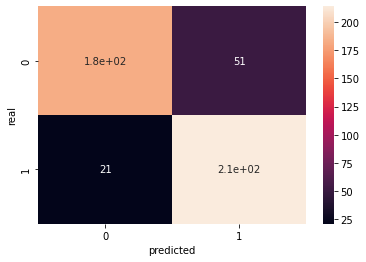

In [64]:
cf_matrix = confusion_matrix(y_test,y_predicted)
sn.heatmap(cf_matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("real")
plt.show()
# now we can...see...error in prediction is damm low 